In [39]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Spice.Netlist import Circuit, SubCircuit
from PySpice.Unit import *

import numpy as np
import matplotlib.pyplot as plt

#INTRODUCTION

## Voltage, current and resistance

**INTRODUCTION**

Did you know that the panel controls and cabinet hardware of an instrument may cost more than the electronics inside? The Art of Electronics equips readers to construct powerful, elegant, yet inexpensive, little gadgets to do almost any conceivable task. It keeps mathematics to a minimum to foster a good intuitive understanding of circuit design and behavior. On this foundation, build *active circuits* with amplifiers, oscillators, logic circuits, etc.

**VOLTAGE, CURRENT AND RESISTANCE**

*Voltage and current*

The two quantities that we want to keep track of in electronic circuits are voltage and current. These are usually time-varying, which is an indicator of electricity being harnessed to perform useful and interesting tasks.

Moving a mass uphill requires energy and downhill movement releases energy that can be harnessed to get work done. In general, uphill is the direction from a point of lower potential to a point of higher potential. In an electrical circuit, voltage represents potential. It is usually represented by the symbol 'V' with unit of measure being volts.

Think of an electrical circuit as an obstacle track for electrical charge. The flow of electrical charge is current. It is usually represented by the symbol 'I' with unit of measure being amperes. The charge itself has unit of measure coulomb. Being the rate of flow, current is coulombs per second and usually expressed in amperes.

By the nature of these entities, voltage is always *across* two points and current is *at* a point. When we refer to voltage *at a point* in a circuit, we implicitly refer to the second point as the *datum* or ground.

The physical realization of a circuit has electrical components that are connected together by wires made of metallic conductors. Any continuous length of wire has the same voltage anywhere on it with respect to, say, ground. This may not be strictly true but is a good approximation.

The engineering drawing of a circuit may not look anything like the physical circuit because wires can be rearranged. It is helpful to think of a circuit as a network graph with junctions as nodes and electrical components as edges. This is the format in which we present a circuit to simulation software.

There are some simple rules about voltage and current. Imagine going for a walk and returning to the starting point. Some sections of the walk may be uphill and others downhill. Having returned to the starting poing, the sum of all the *ups* and *downs* is exactly zero! So also, **the sum of t he voltage drops in any closed circuit is zero**. This is *Kirchoff's voltage law*.

Likewise, *Kirchoff's current law* states that **the sum of currents into a point in a circuit equals the sum of currents out**. This is the law of conservation of charge. These two laws help describe a DC circuit (with a DC voltage source, like a battery) in mathematical equations for circuit analysis, to know the voltage or current at a probe point.

Components connected in parallel (**Fig 1.1**) must have the same voltage across them. Can you see how this follows from Kirchoff's laws?

![Figure 1.1](Assets/AoE_1_1.png)

Circle back to the discussion about energy release going downhill. The energy must be dissipated somehow. Think about lightning, which is electrical charge discharged from clouds. High potential is generated by friction between clouds and builds up until the difference in potential with ground (literally!) breaks down the resistance of the atmosphere. The energy is dissipated as a pressure wave that we hear as a loud thunderclap. Enough energy may remain to damage trees and property and cause bodily harm. 

In an electrical circuit, we dissipate energy safely and in a controlled manner to get work done by a machine. The simplest way to do that is using a resistor. As the name suggests, a resistor provides resistance to the flow of current so that energy is dissipated as heat. How much power do we need to dissipate? The power, P, work per unit time, is product of the voltage, V, work per unit charge, and current, I, charge per unit time.

$$
P = VI
$$

Seen in this way, resistance may seem like a nuisance, but so is friction and without it we wouldn't even be able to walk! Resistors are available in a variety (**Fig 1.2**).

![Figure 1.2](Assets/AoE_1_2.png)

Power may go into mechanical work (motors), radiated energy (lamps, radio transmitters), or stored energy (batteries, capacitor). We can harness energy in many ways with an electrical cicruit. The name of the game is always to get the desired I-versus-V characteristics. The basic building blocks are resistors (I simply proportional to V), capacitors (I proportional to the rate of change of V), inductors (V proportional to the rate of change of I), diodes (I flows in only one direction), thermisters (temperature-dependent resistor), photoresistors (light-dependent resistor), strain gauges (strain-dependent resistor) and more exotic devices. The resistor is a good place to start.

*Relationship between voltage and current: resistors*

The characteristic equation of a resistor (**Fig 1.3**) is as follows:

$$
R = V/I
$$

In a circuit, a resistor is shown like so:

![Fig 1.3](Assets/AoE_1_3.png)

The current (*I*) is proportional to the voltage (*V*) and vice-versa. The resistance (*R*) is the constant of proportionality in this linear relationship between V and I. 

Resistors in a series (**Fig 1.4**) add up. 

$$
    R = R_{1} + R_{2}
$$

The resistance to two resistors in parallel (**Fig 1.5**) is as follows:

$$
\frac{1}{R} = \frac{1}{R_{1}} + \frac{1}{R_{2}}
$$
$$
R = \frac{R_{1}R_{2}}{R_{1} + R_{2}}
$$

![Figs 1.4, 1.5](Assets/AoE_1_4_1_5.png)

Extend both formulae to any number of resistors. For example, for the combination in parallel, the formula is as follows:
$$
R = \frac{1}{\frac{1}{R_{1}} + \frac{1}{R_{2}} + \frac{1}{R_{3}} + ...}
$$

The power dissipated by a resistor (or any other device) is as follows:
$$
P = VI
$$
This works out to the following equation for the power dissipation:
$$
P = I_{2}R = \frac{V_{2}}{R}
$$

Think of a circuit as a device that applies energy to work. For this conversion, the circuit accepts an *input* voltage and produces and *output* voltage across a *load* where the work is done. The relationship between the output and input voltages is referred to as *transfer function* and designated by **H**. For example, an audio amplifier produces a time-varying output that is 100 times as large as the similarly time-varying input applied. The audio amplifier's transfer function is simply a constant (i.e $H = 100$ ) 

With just resistors, one circuit that comes in handy is the **voltage divider**. Let's look at that next and examine with a simulation.

*Voltage dividers*

The voltage divider (**Fig 1.6**) is a circuit that, given a certain voltage input, produces a predictable fraction of the input voltage at the output. 

![Fig 1.6](Assets/AoE_1_6.png)

Applying the definition of resistance and the series law, we arrive at the characteristic equation of the voltage divider as follows:

$$
I = \frac{V_{in}}{R_{1} + R_{2}}
$$

Then, we arrive at the transfer function as follows:

$$
V_{out} = IR_{2} = \frac{R_{2}}{R_{1} + R_{2}} V_{in}
$$

An adjustable voltage divider can be made like so:

![Fig 1.7](Assets/AoE_1_7.png)

Such a configuration with a variable resistor ($R_{2}$) gives the classic *volume control* where a knob adjusts the volume. A variable resistor is referred to as *potentiometer* (**Fig 1.8**).

![Fig 1.7](Assets/AoE_1_8.png)



**Simulation: Voltage Divider**

Simulate the circuit shown in **Fig 1.6** with $R_{1} = 10 k\Omega$ and $R_{2} = 10 k\Omega$. We'll use a source $V_{in} = 15 V$.

In [40]:
VoltageDivider = Circuit("VOLTAGE DIVIDER")
VoltageDivider.V('Vin', 'input', VoltageDivider.gnd, 15@u_V)
VoltageDivider.R('R1', 'input', 'output', 10@u_kOhm)
VoltageDivider.R('R2', 'output', VoltageDivider.gnd, 10@u_kOhm)

print(VoltageDivider)

.title VOLTAGE DIVIDER
VVin input 0 15V
RR1 input output 10kOhm
RR2 output 0 10kOhm



In [41]:
VDsim = VoltageDivider.simulator(temperature=25, nominal_temperature=25, \
    simulator='ngspice-shared')
results = VDsim.operating_point()

In [42]:
print("Got Vin as {} and Vout as {}".format(float(results['input']), \
    format(float(results["output"]))))

Got Vin as 15.0 and Vout as 7.5


It is worth noting that the output is in the *no load* condition and application of load will change the gain.

The voltage source may be one of two kinds. A Direct Current (DC) source supplies a constant voltage. An Alternating Current (AC) source supplies a cyclically time-varying voltage. In the voltage divider, we used a DC source. An example of such a source is a battery, which is the natural choice for gadgets where portability is a key design consideration. 

However, the transmission and distribution of power from the utility co. is in AC form. Remember the equation for power?
$$
P = VI = I^{2}R
$$
Distribution of power over cables implies loss due to the electrical resistance of the conductor. One way to reduce the loss is to lower R which means using thicker cables. This approach quickly hits a limit as it implies higher cost and weight of cables. What if we could transmit the same power but with much higher voltage and much lower current? Say, increase the voltage by a factor of 1000 while the current becomes 1000 times smaller?

This is possible only with AC current, using a device called *transformer*. Metal cables can easily withstand the high voltages and with proper insulation, high-voltage power lines are a safe and efficient way to transmit electrical power. The power must be *stepped down* by the time it reaches homes or factories, to the standard outlet voltage (110 volts or 240 volts), usually in several steps.

The story of AC-DC is the story of a tussle between two innovative minds of the 19th century, Thomas Edison and Nikola Tesla. Tesla introduced a plethora innovations to propel AC technology to prominence. Edison (and the company he helped start, General ELectric,) favored DC technology. As the merits of AC became self-evident, Edison is said to have launched a smear campaign to cast a pall and shift public sentiment. He famously electrocuted an elephant, Topsy, in New York to show the "dangers" of AC. However, the campaign didn't work and AC won out in the [war of the currents](https://www.energy.gov/articles/war-currents-ac-vs-dc-power).

![Figs 1_9, 1_10](Assets/AoE_1_9_1_10.png)

**With electric vehicles emerging as the poster child of the battery-powered revolution, another Tesla may may reignite the war!**

![ITried2WarnYou](Assets/ITried2WarnYou.gif)

Not all resistor circuits can be resolved into combinations of resistors in series and in parallel. A classic example is a cube made of 12 resistors as follows:

![Thevenin](Assets/Thevenin.gif) 

This circuit **cannot be resolved** into combinations of resistors in series and in parallel in the conventional way. What is a general approach to evaluate the resistance between A and B?



**SIMULATION: RESISTOR NETWORK**

Let us approach this problem with simulation. Create the netlist and calculate the current from the three branches that sink current into A. Calculate the current in each branch from the voltage difference based on simulation results and then sum over the branches. Then use Ohm's law to calculate the net resistance is V/I. Compare with the expected result from theory.

![Thevenin2](Assets/Thevenin2.gif) 

In [43]:
CubeDC = Circuit("DC CUBE")
CubeDC.V('Vin', 'B', 'A', 10@u_V)
CubeDC.R('R01', 'B', 'B1', 100@u_Ohm)
CubeDC.R('R02', 'B', 'B2', 100@u_Ohm)
CubeDC.R('R03', 'B', 'B3', 100@u_Ohm)
CubeDC.R('R04', 'B1', 'A1', 100@u_Ohm)
CubeDC.R('R05', 'B1', 'A3', 100@u_Ohm)
CubeDC.R('R06', 'B2', 'A1', 100@u_Ohm)
CubeDC.R('R07', 'B2', 'A2', 100@u_Ohm)
CubeDC.R('R08', 'B3', 'A2', 100@u_Ohm)
CubeDC.R('R09', 'B3', 'A3', 100@u_Ohm)
CubeDC.R('R10', 'A1', 'A', 100@u_Ohm)
CubeDC.R('R11', 'A2', 'A', 100@u_Ohm)
CubeDC.R('R12', 'A3', 'A', 100@u_Ohm)
print(CubeDC)


.title DC CUBE
VVin B A 10V
RR01 B B1 100Ohm
RR02 B B2 100Ohm
RR03 B B3 100Ohm
RR04 B1 A1 100Ohm
RR05 B1 A3 100Ohm
RR06 B2 A1 100Ohm
RR07 B2 A2 100Ohm
RR08 B3 A2 100Ohm
RR09 B3 A3 100Ohm
RR10 A1 A 100Ohm
RR11 A2 A 100Ohm
RR12 A3 A 100Ohm



In [44]:
sim = CubeDC.simulator(temperature=25, nominal_temperature=25)
res = sim.operating_point()
for name, data in res.nodes.items():
    print("{}: {}".format(name, np.array(data)), end = "; ")

a2: [-3.2]; a3: [-3.2]; a1: [-3.2]; b3: [-1.2]; b2: [-1.2]; b1: [-1.2]; a: [-7.2]; b: [2.8]; 

In [45]:
ATeam = ['a1', 'a2', 'a3']
iout = sum([(float(res[node]) - float(res['a']))/100 for node in ATeam])
print("The current out of the cube is {:.2f} amps, summing over branches sinking to A.".format(iout))
print("This makes {:.2f} ohms the cube resistance by V/I.".format(10.0/iout))
print("Expected {:.2f} from 5/6 x 100 ohms.".format(500/6))




The current out of the cube is 0.12 amps, summing over branches sinking to A.
This makes 83.33 ohms the cube resistance by V/I.
Expected 83.33 from 5/6 x 100 ohms.


This case for a general approach to cicruit analysis makes a segue into **Thevenin's equivalent circuit**. Thevenin's theorem states that any two-terminal network of resistors and voltage source is equivaent to a circuit with a single resistor R in series with a single voltage source V.

This is remarkable! It means that any mess of batteries and resistors can be mimicked with one battery and one resistor (**Fig 1.9**).

![Fig 1.9](Assets/AoE_1_11.png)



In [53]:
VLVD = Circuit("VARIABLE LOAD VOLTAGE DIVIDER")
VLVD.V('Vin', 'input', VLVD.gnd, 15@u_V)
VLVD.R('R1', 'input', 'output', 10@u_kOhm)
VLVD.R('R2', 'output', VLVD.gnd, 10@u_kOhm)
VLVD.R('RLoad', 'output', VLVD.gnd, 10@u_kOhm)

print(VLVD)

.title VARIABLE LOAD VOLTAGE DIVIDER
VVin input 0 15V
RR1 input output 10kOhm
RR2 output 0 10kOhm
RRLoad output 0 10kOhm



In [58]:
sim = VLVD.simulator(temperature=25, nominal_temperature=25)
res = sim.dc(VVin = slice(15, 16, 1), RRLoad = slice(0, 100000, 1000))
Vout = np.array(res['output'])

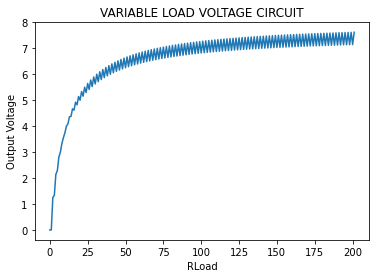

In [61]:
plt.title("VARIABLE LOAD VOLTAGE CIRCUIT")
plt.xlabel("RLoad")
plt.ylabel("Output Voltage")
plt.plot(Vout)
plt.show()

## Signals

## Capacitors and ac circuits

## Inductors and transformers

## Impedance and reactance

## Diodes and diode circuit

## Other passive components